## Figure 14 (Journal of Climate submission; Molina et al.)

Fig.14. DJF mean SSTs (◦C) and surface wind stress (N m−2) during (a) El Niño (ONI≥+0.5) and (g) LaNiña (ONI≤-0.5) shown for the CESM1 control across the Niño 3.4 region. DJF mean SST anomalies duringEl Niño and La Niña are also shown for the sensitivity experiments (b-f, h-l) as computed from the respectiveCESM1 control (a, g). Time periods considered are the same as in Fig. 2.

**Figure by: Maria J. Molina, NCAR**

In [1]:
import xarray as xr
import numpy as np
from climatico import enso
from climatico.util import weighted_mean, pacific_lon
import matplotlib.pyplot as plt
import cftime
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import matplotlib.patches as mpatches
import cartopy.feature as cfeature
from shapely.geometry.polygon import Polygon
import matplotlib.patches as mpatches

In [2]:
from config import directory_figs, directory_data

In [3]:
ninodata = xr.open_dataset(f'{directory_data}fig10_ninodata.nc')
ninadata = xr.open_dataset(f'{directory_data}fig11_ninadata.nc')
climdata = xr.open_dataset(f'{directory_data}fig11_climodata.nc')

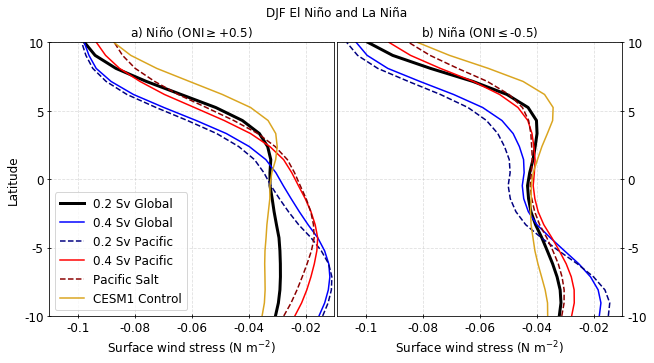

In [4]:
# -------------- create figure

a = u"\u00b0"

fig = plt.figure(figsize=(8,4))

fig.suptitle(u'DJF El Niño and La Niña', x=0.5, y=1.075, fontsize=12)

# --------------

ax1 = plt.axes([0., 0., 0.495, 0.95])

ax1.set_title('a) Niño (ONI$\geq$+0.5)', fontsize=12)

l1, = ax1.plot(ninodata['cntrl_diff_ninotx'].mean('x'),range(len(ninodata['psalt_diff_ninotx'].mean('x').coords['y'])),c='k',lw=3.);
l2, = ax1.plot(ninodata['g02sv_diff_ninotx'].mean('x'),range(len(ninodata['psalt_diff_ninotx'].mean('x').coords['y'])),c='blue',lw=1.5);
l3, = ax1.plot(ninodata['g04sv_diff_ninotx'].mean('x'),range(len(ninodata['psalt_diff_ninotx'].mean('x').coords['y'])),c='navy',lw=1.5,ls='--');
l4, = ax1.plot(ninodata['p02sv_diff_ninotx'].mean('x'),range(len(ninodata['psalt_diff_ninotx'].mean('x').coords['y'])),c='red',lw=1.5);
l5, = ax1.plot(ninodata['p04sv_diff_ninotx'].mean('x'),range(len(ninodata['psalt_diff_ninotx'].mean('x').coords['y'])),c='darkred',lw=1.5,ls='--');
l6, = ax1.plot(ninodata['psalt_diff_ninotx'].mean('x'),range(len(ninodata['psalt_diff_ninotx'].mean('x').coords['y'])),c='goldenrod',lw=1.5);

ax1.legend([l1,l2,l3,l4,l5,l6],           
           ['0.2 Sv Global',
            '0.4 Sv Global',
            '0.2 Sv Pacific',
            '0.4 Sv Pacific',
            'Pacific Salt',
            'CESM1 Control'], fancybox=True, ncol=1, loc='lower left', fontsize=12)

ax1.margins(x=0,y=0)

ax1.set_ylabel('Latitude',fontsize=12)
ax1.set_xlabel('Surface wind stress (N m$^{−2}$)',fontsize=12)

ax1.grid(alpha=0.4, ls='--')

ax1.set_yticks([0,5.25,10.5,15.75,21])
ax1.set_yticklabels([-10, -5, 0, 5, 10],fontsize=12)

ax1.set_xticks([-0.1,-0.08,-0.06,-0.04,-0.02])
ax1.set_xticklabels([-0.1,-0.08,-0.06,-0.04,-0.02],fontsize=12)
ax1.set_xlim([-0.11,-0.01])

ax1.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=True, bottom=True)

# --------------

ax2 = plt.axes([0.5, 0., 0.495, 0.95])

ax2.set_title('b) Niña (ONI$\leq$-0.5)', fontsize=12)

ax2.plot(ninadata['cntrl_diff_ninatx'].mean('x'),range(len(ninodata['psalt_diff_ninotx'].mean('x').coords['y'])),c='k',lw=3.);
ax2.plot(ninadata['g02sv_diff_ninatx'].mean('x'),range(len(ninodata['psalt_diff_ninotx'].mean('x').coords['y'])),c='blue',lw=1.5);
ax2.plot(ninadata['g04sv_diff_ninatx'].mean('x'),range(len(ninodata['psalt_diff_ninotx'].mean('x').coords['y'])),c='navy',lw=1.5,ls='--');
ax2.plot(ninadata['p02sv_diff_ninatx'].mean('x'),range(len(ninodata['psalt_diff_ninotx'].mean('x').coords['y'])),c='red',lw=1.5);
ax2.plot(ninadata['p04sv_diff_ninatx'].mean('x'),range(len(ninodata['psalt_diff_ninotx'].mean('x').coords['y'])),c='darkred',lw=1.5,ls='--');
ax2.plot(ninadata['psalt_diff_ninatx'].mean('x'),range(len(ninodata['psalt_diff_ninotx'].mean('x').coords['y'])),c='goldenrod',lw=1.5);

ax2.margins(x=0,y=0)
ax2.set_xlabel('Surface wind stress (N m$^{−2}$)',fontsize=12)

ax2.grid(alpha=0.4, ls='--')

ax2.set_yticks([0,5.25,10.5,15.75,21])
ax2.set_yticklabels([-10, -5, 0, 5, 10],fontsize=12)

ax2.set_xticks([-0.1,-0.08,-0.06,-0.04,-0.02])
ax2.set_xticklabels([-0.1,-0.08,-0.06,-0.04,-0.02],fontsize=12)
ax2.set_xlim([-0.11,-0.01])

ax2.tick_params(axis='both', labelleft=False, left=False, right=True, labelright=True, 
                direction='inout', labelbottom=True, bottom=True)

# --------------

plt.savefig(f'{directory_figs}amocenso_fig14v2.png', bbox_inches='tight', dpi=200)
plt.savefig(f'{directory_figs}amocenso_fig14v2.pdf', bbox_inches='tight', dpi=500)
plt.show()

# --------------